# Étape 1 : Chargement et aperçu des données

Objectifs : vérifier la structure du fichier, identifier les variables et repérer les premières incohérences

In [1]:
import pandas as pd

df = pd.read_csv("../data/cs-training.csv")
print(df.shape)
df.head()

(150000, 12)


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


# Étape 2 : Comprendre la cible (SeriousDlqin2yrs)

Objectifs : voir le déséquilibre éventuel entre les classes (défaut ou non).

In [2]:
df["SeriousDlqin2yrs"].value_counts(normalize=True)

SeriousDlqin2yrs
0    0.93316
1    0.06684
Name: proportion, dtype: float64

# Étape 3 : Vérification des données manquantes

Objectif : identifier les colonnes qui ont des valeurs nulles ou aberrantes.

In [3]:
df.isnull().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [4]:
# Remplissage par la médiane (souvent plus robuste que la moyenne)
df["MonthlyIncome"] = df["MonthlyIncome"].fillna(df["MonthlyIncome"].median())

In [5]:
# Création d'une variable indicatric pour NumberOfDependents. Cela permet à au modèle de "prendre en compte" cette absance d'information.
df["NumberOfDependents"] = df["NumberOfDependents"].isnull().astype(int)

In [6]:
df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.418455e+03,8.452760,0.265973,1.018240,0.240387,0.026160
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.289040e+04,5.145951,4.169304,1.129771,4.155179,0.159611
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.903000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,7.400000e+03,11.000000,0.000000,2.000000,0.000000,0.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,1.000000


# Étape 4 : Visualisations de 

Objectif : détecter des tendances ou anomalies avec des graphiques simples.

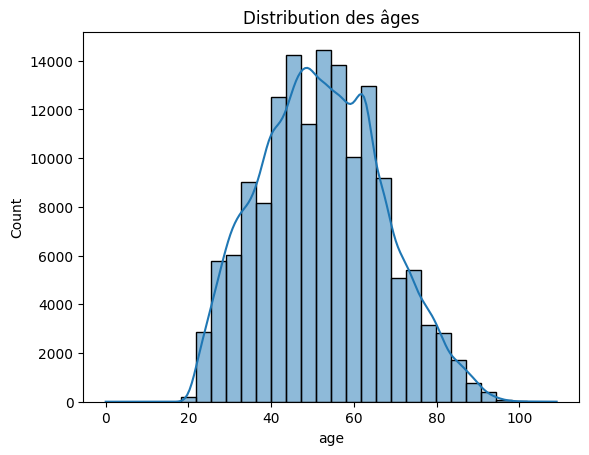

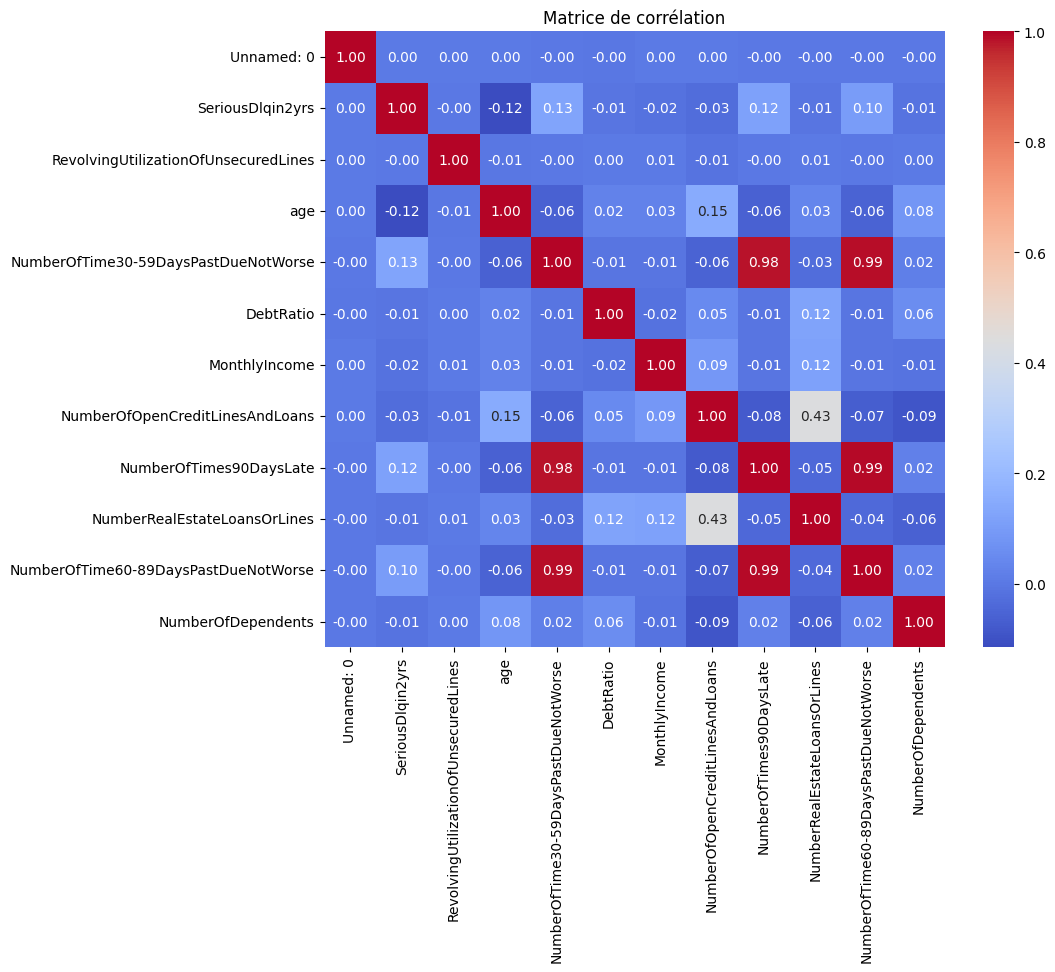

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution des âges
sns.histplot(df.age, bins=30, kde=True)
plt.title("Distribution des âges")
plt.show()

# Corrélation entre variables
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()

### Création de variables combinées

Les 3 colonnes de retard (30-59, 60-89, 90+ jours) sont très corrélées donc je vais faire une somme totale des incidents de paiement :

In [8]:
df["TotalLatePayments"] = (
    df["NumberOfTime30-59DaysPastDueNotWorse"] +
    df["NumberOfTime60-89DaysPastDueNotWorse"] +
    df["NumberOfTimes90DaysLate"]
)

# Cela réduit la redondance, diminue la dimensionnalité, et améliore la clarté.

In [9]:
numeric_features = [
    "RevolvingUtilizationOfUnsecuredLines",
    "age",
    "DebtRatio",
    "MonthlyIncome",
    "NumberOfOpenCreditLinesAndLoans",
    "NumberOfDependents",
    "TotalLatePayments"
]

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Pipeline de transformation des variables numériques
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Assembleur de prétraitements
preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features)
], remainder="passthrough")  # conserve les autres colonnes

In [12]:
from sklearn.model_selection import train_test_split

X = df.drop("SeriousDlqin2yrs", axis=1)
y = df["SeriousDlqin2yrs"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42)
}


In [35]:
# # Boucle d'entraînement et d’évaluation
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

results = {}

for name, clf in models.items():
    pipeline = Pipeline([
        ("preprocessor", preprocessor),  # ton préprocessing avec standardisation
        ("classifier", clf)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]
    
    auc = roc_auc_score(y_test, y_proba)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    results[name] = {
        "model": pipeline,
        "auc": auc,
        "f1": f1,
        "confusion_matrix": cm
    }
    
    print(f"\n🎯 {name}")
    print("AUC:", round(auc, 3))
    print("F1-score:", round(f1, 3))
    print("Confusion matrix:\n", cm)
    print(classification_report(y_test, y_pred))


🎯 Logistic Regression
AUC: 0.711
F1-score: 0.086
Confusion matrix:
 [[27932    63]
 [ 1912    93]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     27995
           1       0.60      0.05      0.09      2005

    accuracy                           0.93     30000
   macro avg       0.77      0.52      0.53     30000
weighted avg       0.91      0.93      0.91     30000


🎯 Random Forest
AUC: 0.845
F1-score: 0.273
Confusion matrix:
 [[27704   291]
 [ 1642   363]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     27995
           1       0.56      0.18      0.27      2005

    accuracy                           0.94     30000
   macro avg       0.75      0.59      0.62     30000
weighted avg       0.92      0.94      0.92     30000


🎯 XGBoost
AUC: 0.86
F1-score: 0.291
Confusion matrix:
 [[27649   346]
 [ 1604   401]]
              precision    recall  f1-score   support

          

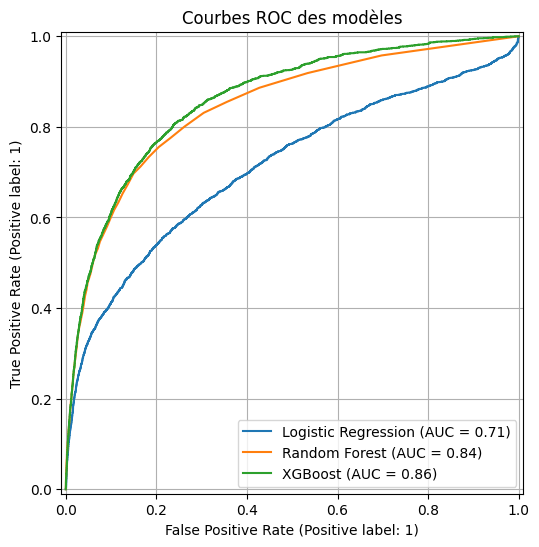

In [36]:
plt.figure(figsize=(8, 6))

for name, res in results.items():
    RocCurveDisplay.from_estimator(res["model"], X_test, y_test, name=name, ax=plt.gca())

plt.title("Courbes ROC des modèles")
plt.grid(True)
plt.show()

In [37]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "classifier__n_estimators": [100, 200],
    "classifier__max_depth": [3, 5, 7],
    "classifier__learning_rate": [0.05, 0.1]
}

grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring="roc_auc", cv=5)
grid.fit(X_train, y_train)

print("Best AUC:", grid.best_score_)
print("Best params:", grid.best_params_)


Best AUC: 0.8638345594686754
Best params: {'classifier__learning_rate': 0.05, 'classifier__max_depth': 5, 'classifier__n_estimators': 100}


D'après les resultats le mode XGBOOST de meilleur résultat donc je vais garder ce model pour la suite

In [38]:
# Enregistrement du modèle
import joblib

joblib.dump(pipeline, "../models/xgboost_pipeline.pkl")

FileNotFoundError: [Errno 2] No such file or directory: '../models/xgboost_pipeline.pkl'